In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import XGBClassifier



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clasif-posturas-mano/data_train.csv
/kaggle/input/clasif-posturas-mano/data_test.csv
/kaggle/input/clasif-posturas-mano/samplesubmission.csv


In [2]:
data_train=pd.read_csv('../input/clasif-posturas-mano/data_train.csv')
data_test=pd.read_csv('../input/clasif-posturas-mano/data_test.csv')
sample_submission = pd.read_csv('../input/clasif-posturas-mano/samplesubmission.csv')

In [3]:
y = data_train['Class']
X = data_train.drop(['Class', 'User'], axis=1)
data_test

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,14,16.303850,85.045554,-64.021761,28.742703,-1.581706,-0.411562,-1.703684,79.453834,-54.980910,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
1,14,-0.810012,121.965695,33.520061,-10.024520,80.890313,13.934838,66.938737,139.870441,8.232298,...,-47.313530,55.944924,98.426897,-8.946855,60.575006,38.369045,-53.29325,-999.0,-999.0,-999.0
2,11,54.505324,131.279733,13.612488,25.075243,101.082240,3.792827,93.631120,29.151855,-58.742728,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
3,11,46.436653,100.607077,-30.582205,26.706400,100.640787,-26.132694,76.843962,53.134633,-54.553725,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
4,2,80.701573,39.976647,-71.285619,40.116999,70.716270,-59.981909,62.016277,62.435918,-56.895893,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35138,10,52.139085,-6.172711,-83.063769,35.127190,75.048248,-59.102349,67.372932,31.076155,-88.565691,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
35139,7,80.843513,-27.038662,-42.184807,102.515384,-3.885654,-35.619874,70.737404,66.520162,-8.680220,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
35140,6,78.266695,86.666011,-23.871966,52.053413,95.635896,-2.835111,49.903999,142.553778,-35.240655,...,-31.083657,76.419721,53.009372,-83.950008,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0
35141,12,10.357343,85.235507,-42.921405,-10.809778,81.262534,-38.131250,48.823006,45.540894,-94.294336,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.0,-999.0,-999.0


# Baseline model

In [4]:
#base_xgboost = XGBClassifier(random_state=0).fit(X, y) 
#scores = cross_val_score(base_xgboost, X, y, cv=5)
#print(f'Mean accuracy: {np.mean(scores):.4f} (std: +/- {np.std(scores):.4f})')


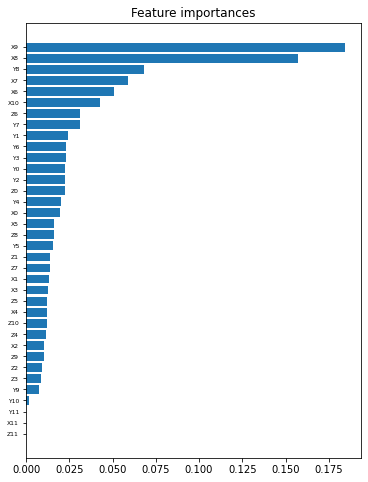

In [5]:
# Entreno un modelo con los nuevos datos, para poder ver la importancia de cada variable
base_xgboost = XGBClassifier(random_state=0).fit(X, y)

#plot feature importance from the base_rf model, sorted by importance
importances = base_xgboost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 8))
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), X.columns[indices], fontsize=6)
plt.title("Feature importances")
plt.show();

# Preprocesamiento

In [6]:
X = X.drop(['X11', 'Y11', 'Z11'], axis=1)
data_test = data_test.drop(['X11', 'Y11', 'Z11'], axis=1)

# Features creation

In [7]:
# Estos son los nuevos datos de entrenamiento
X_new = X.copy()
# Construyo 11 nuevos valores con la longitud de cada vector
for i in range(0, 11):
    X_new[f'L{i}'] = np.linalg.norm(X_new[[f'X{i}', f'Y{i}', f'Z{i}']].values, axis=1)

In [8]:
# Estos son los nuevos datos de entrenamiento
data_new = data_test.copy()
# Construyo 11 nuevos valores con la longitud de cada vector
for i in range(0, 11):
    data_new[f'L{i}'] = np.linalg.norm(data_new[[f'X{i}', f'Y{i}', f'Z{i}']].values, axis=1)

Arriba se muestra un plot con la influencia que tiene cada variable y se ha optado por eliminar X11,Y11,Z11.

In [9]:
xgb_cv = XGBClassifier(n_estimators=1000,objective = 'multi:softmax')
record_scores = cross_val_score(xgb_cv, X_new, y,cv=5, scoring = "accuracy")
print("Scores:", record_scores)
print(f'Mean accuracy: {np.mean(record_scores):.4f} (std: +/- {np.std(record_scores):.4f})')

Scores: [0.99487836 0.99499476 0.99441211 0.99476135 0.99394645]
Mean accuracy: 0.9946 (std: +/- 0.0004)


In [10]:
xgb_cv.fit(X_new,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [11]:
from sklearn import metrics
pred = xgb_cv.predict(data_new.drop('User',axis = 1))


In [12]:
subm = pd.DataFrame({'Id': np.linspace(0, len(data_test)-1, len(data_test), dtype = 'int'), 'Category': pred})


In [13]:
subm.to_csv('submission.csv', index=None)

In [14]:
subm.shape

(35143, 2)